In [1]:
import numpy as np

In [3]:
print("hello")

hello


Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64


Text(0.5, 1.0, 'Distribution of Decks')

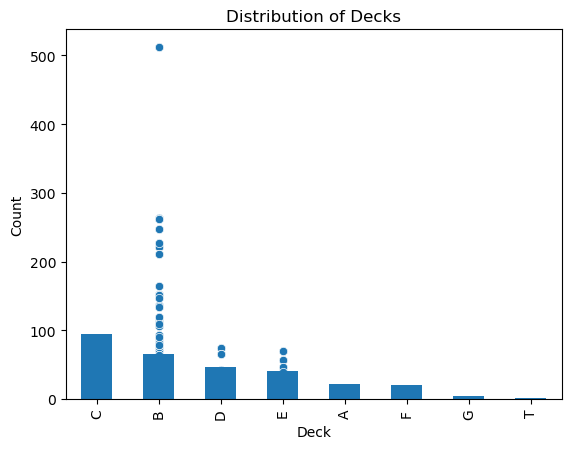

In [4]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('/Users/annikaseo-yeonkim/Desktop/아무거나/kaggle/titanic/train.csv')
test_data = pd.read_csv('/Users/annikaseo-yeonkim/Desktop/아무거나/kaggle/titanic/test.csv')
# women = train_data.loc[train_data.Sex == 'female']["Survived"]
# rate_women = sum(women)/len(women)

# print("% of women who survived:", rate_women)

# men = train_data.loc[train_data.Sex == 'male']["Survived"]
# rate_men = sum(men)/len(men)

# print("% of men who survived:", rate_men)

# plt.xlabel('sex', size=15, labelpad=15)
# plt.ylabel('Passenger Count', size=15, labelpad=15)

# sns.barplot(x = train_data['Sex'], y = train_data['Survived'])
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = train_data[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))
    

# category1 = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]
# for c in category1:
#     bar_plot(c)

# category2 = ["Cabin", "Name", "Ticket"]
# for c in category2:
#     print("{} \n".format(train_data[c].value_counts()))

pclass_survival_rates= train_data[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)
# print(pclass_survival_rates)

sex_survival_rates = train_data[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)
# sns.lmplot(sex_survival_rates)
# print(sex_survival_rates)


sibsp_survived =train_data[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)
# print(sibsp_survived)

train_df_len = len(train_data)
train_df = pd.concat([train_data,test_data],axis = 0).reset_index(drop = True)

# print(train_df.isnull().sum())
train_df[train_df["Embarked"].isnull()]
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
# sns.heatmap(train_df[list1].corr(), annot = True, fmt = ".2f")
# plt.show()

# sns.barplot(x="Sex", y="Pclass", data=train_data,palette="Set3")
# plt.show()

# g = sns.FacetGrid(train_df, col = "Survived")
# g.map(sns.lmplot, "Age", bins = 25)
# plt.show()

# find out which attribute has the strongest correlation with the passenger's age
# sns.scatterplot(x= 'Age',y='Fare',data = train_df)


# correlation_matrix = train_df.corr()
# get the correlation coefficients - age and Pclass have the strongest correlation: -0.41
correlation_coefficient = train_df['Age'].corr(train_df['Pclass'])

#get the median age of each Pclass
median_age_by_pclass = train_df.groupby('Pclass')['Age'].median()
# print(median_age_by_pclass)

def fill_age(row):
    if pd.isnull(row['Age']):
        return median_age_by_pclass[row['Pclass']]
    else:
        return row['Age']
    
train_df['Age'] = train_df.apply(fill_age, axis=1)


#repeat the same for the 'Fare' and 'Embarked' columns
sns.scatterplot(x= 'Pclass',y='Fare',data = train_df)
correlation_coefficient2 = train_df['Pclass'].corr(train_df['Fare'])
# plt.show()



median_fare_pclass = train_df.groupby('Pclass')['Fare'].median()
print(median_fare_pclass)
# def fill_fare(row):
#     if pd.isnull(row['Fare']):
#         return median_fare_pclass[row['Fare']]
#     else:
#         return row['Fare']

# train_df['Fare'] = train_df.apply(fill_fare, axis=1)

# Cabin column distribution
# print(train_df['Cabin'].value_counts(dropna = False))

# need to create a new column called deck using the values from the 'cabin' column
# we only need to know which cabin (cabin A, B, C...) the passenger was in
train_df['Deck'] = train_df['Cabin'].str.slice(0,1)

deck_distribution = train_df['Deck'].value_counts(dropna = True)

deck_distribution.plot(kind='bar')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.title('Distribution of Decks')


